# **하이퍼파라미터**

## 하이퍼파라미터의 역할

> “모델이 학습하는 방법을 사람이 정하는 값”
> 

하이퍼파라미터는 모델이 스스로 학습하지 못하는,

**훈련의 방향·속도·강도**를 결정하는 외부 설정값입니다.

| 구분 | 예시 | 역할 |
| --- | --- | --- |
| **학습 제어** | Batch Size, Epoch, Learning Rate | 학습의 속도와 안정성 조절 |
| **모델 구조** | LSTM unit, Dropout rate | 복잡도·일반화 조절 |
| **최적화 알고리즘** | Optimizer(Adam, SGD, RMSprop) | 가중치 갱신 방식 결정 |

> 💬 “하이퍼파라미터는 조타핸들이고, 모델 파라미터는 엔진이다.”
>

## 하이퍼파라미터 자동 탐색 (Grid vs Bayesian)

### 1️⃣ 개념 요약

| 탐색법 | 특징 | 장점 | 단점 |
| --- | --- | --- | --- |
| **Grid Search** | 모든 조합 탐색 | 단순, 완전 탐색 | 느림, 조합 폭발 |
| **Random Search** | 랜덤 시도 | 빠름, 효율적 | 최적점 놓칠 수 있음 |
| **Bayesian Optimization** | 성능 기반으로 다음 지점 예측 | 적은 시도로 높은 효율 | 구현 복잡 |

>
 💬 Grid는 “모든 문제집 풀기_모든경우의수탐색”, Bayesian은 “잘 맞는 문제집에 집중하기”
>

In [3]:
# 그리드서치

from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print("✅ Grid Search Best Params:", grid.best_params_)
print("Validation Accuracy:", grid.score(X_val, y_val))

✅ Grid Search Best Params: {'C': 1, 'solver': 'lbfgs'}
Validation Accuracy: 1.0


In [6]:
# 베이지안 
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
def lr_cv(C):
    model = LogisticRegression(C=C, solver='liblinear', max_iter=500)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

optimizer = BayesianOptimization(
    f=lr_cv,
    pbounds={'C': (0.01, 10)},
    random_state=42
)
optimizer.maximize(init_points=3, n_iter=5)

print("✅ Bayesian Search Best:", optimizer.max)

|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.9583333 | 3.7516557 |
| 2         | 0.9500000 | 9.5076359 |
| 3         | 0.9500000 | 7.3226194 |
| 4         | 0.9500000 | 1.8344250 |
| 5         | 0.9583333 | 3.7516463 |
| 6         | 0.9583333 | 4.1142780 |
| 7         | 0.9583333 | 5.3972819 |
| 8         | 0.6583333 | 0.01      |
✅ Bayesian Search Best: {'target': np.float64(0.9583333333333334), 'params': {'C': np.float64(3.7516557872851513)}}


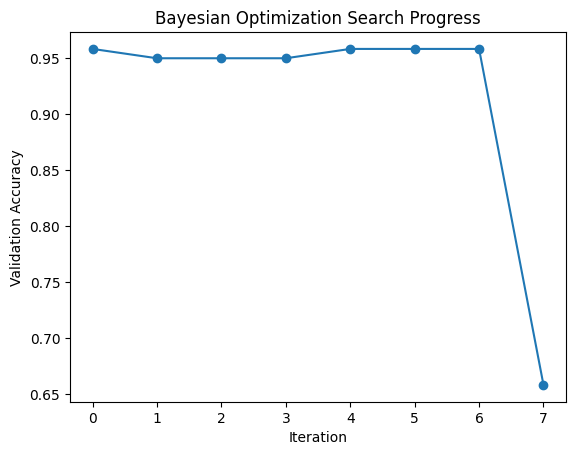

In [9]:
import matplotlib.pyplot as plt

iters = list(range(len(optimizer.res)))
scores = [r['target'] for r in optimizer.res]
plt.plot(iters, scores, marker='o')
plt.title("Bayesian Optimization Search Progress")
plt.xlabel("Iteration"); plt.ylabel("Validation Accuracy")
plt.show()


## IV. 정리 및 사고 전환

| 구분 | 핵심 질문 | 의미 |
| --- | --- | --- |
| Batch | 학습 안정 vs 일반화 중 어느 쪽이 중요한가? | 데이터 규모 따라 결정 |
| Epoch | 언제 멈추는 게 최적인가? | EarlyStopping으로 제어 |
| Optimizer | 어떤 방식이 데이터에 적합한가? | 실험으로 검증 |
| 탐색 방식 | 모든 조합 vs 똑똑한 조합 | 효율성과 정확도 균형 |

> “하이퍼파라미터 튜닝은 모델의 ‘공부법’을 찾는 과정이다.”
>

- Hyperparameter: 
      모델을 설계하는 과정에서 선택하는 변수들입니다. 예를 들어, 머신 러닝 알고리즘에 사용되는 모델 크기, 학습률 등이 있습니다.
- Fine-tuning: 
      기존의 트레이닝된 네트워크 모델을 다른 데이터로 다시 교육시켜서 새로운 기능이나 성능을 얻는 것이라고 할 수 있습니다. 예를 들어, 이미 있는 Face Recognition Model에서 Eye Detection Model을 만드는 것입니다.